# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка. 

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов. 

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [1]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [2]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [3]:
import numpy as np

In [4]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [5]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
target = iris_dataset["target"]

In [7]:
iris_dataset_1 = np.delete(iris_dataset["data"], [0], axis=1)
iris_dataset_2 = np.delete(iris_dataset["data"], [1], axis=1)

### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [8]:
# если работаете в интерактивной оболочке IPython 
% matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

Text(0.5, 0, 'petal width')

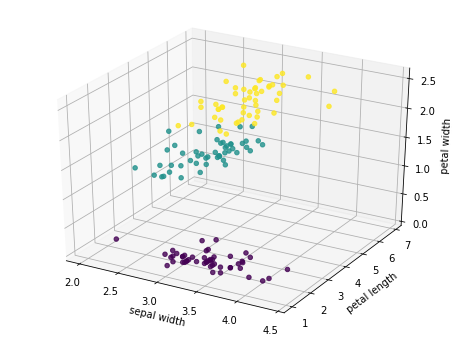

In [9]:
plt.figure(figsize=(8, 6))

ax = plt.axes(projection='3d')
ax.scatter3D(
    *np.transpose(iris_dataset_1), 
    alpha=0.8, 
    c=iris_dataset["target"]
);

labels = np.delete([x[:-5] for x in iris_dataset["feature_names"]], [0], axis=0)
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])

Text(0.5, 0, 'petal width')

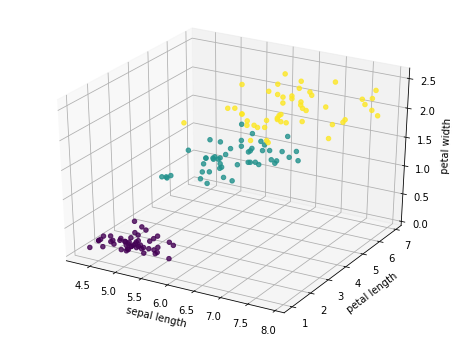

In [10]:
plt.figure(figsize=(8, 6))

ax = plt.axes(projection='3d')
ax.scatter3D(
    *np.transpose(iris_dataset_2), 
    alpha=0.8, 
    c=iris_dataset["target"]
);

labels = np.delete([x[:-5] for x in iris_dataset["feature_names"]], [1], axis=0)
ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    iris_dataset_1, target, test_size=0.2, random_state=317
)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    iris_dataset_2, target, test_size=0.2, random_state=317
)

### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_1 = accuracy_score(
    y_test_1, KNeighborsClassifier().fit(x_train_1, y_train_1).predict(x_test_1)
)
accuracy_2 = accuracy_score(
    y_test_2, KNeighborsClassifier().fit(x_train_2, y_train_2).predict(x_test_2)
)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 0.9666666666666667, accuracy_2: 0.9666666666666667


### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [15]:
n_runs = 250
accuracies = []
for i in range(1, 21):
  accuracy = []
  for r in range(n_runs):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
      iris_dataset_1, target, test_size=0.2, 
    )
    acc = accuracy_score(
      y_test_1, 
      KNeighborsClassifier(i)
      .fit(x_train_1, y_train_1)
      .predict(x_test_1)
    )
    accuracy.append(acc)

  accuracies.append((i, np.mean(accuracy), np.var(accuracy)))

accuracies.sort(key=lambda x: (x[2], -x[1]))
for neighbors_count, acc, var in accuracies:
  print(f"neighbors={neighbors_count:02}, accuracy={acc:.04}, var={var:.04}")


neighbors=11, accuracy=0.9663, var=0.0007776
neighbors=06, accuracy=0.9624, var=0.0008618
neighbors=13, accuracy=0.9684, var=0.0008726
neighbors=12, accuracy=0.9651, var=0.0008774
neighbors=07, accuracy=0.9643, var=0.0008831
neighbors=05, accuracy=0.9603, var=0.0008835
neighbors=14, accuracy=0.9637, var=0.0009247
neighbors=09, accuracy=0.9615, var=0.0009285
neighbors=08, accuracy=0.9592, var=0.0009576
neighbors=15, accuracy=0.9645, var=0.0009999
neighbors=19, accuracy=0.9589, var=0.001007
neighbors=10, accuracy=0.9605, var=0.001029
neighbors=03, accuracy=0.9541, var=0.00107
neighbors=16, accuracy=0.9611, var=0.001098
neighbors=18, accuracy=0.9536, var=0.0011
neighbors=01, accuracy=0.954, var=0.001142
neighbors=04, accuracy=0.9613, var=0.001145
neighbors=17, accuracy=0.9637, var=0.001183
neighbors=02, accuracy=0.9497, var=0.001291
neighbors=20, accuracy=0.9512, var=0.001503


### Бонус

In [16]:
from collections import Counter
from heapq import nsmallest
from typing import Callable, List, Tuple
from scipy.spatial.distance import euclidean


def fit_knn(
  X_train: np.ndarray, y_train: np.ndarray, n: int
) -> Callable[[np.ndarray], np.ndarray]:
  
  def get_neighbors(X: np.ndarray) -> np.ndarray:
    distances: List[Tuple[float, int]] = []
    for i in range(len(X_train)):
      distances.append(
          (euclidean(X_train[i], X), i)
      )
    closest = nsmallest(n, distances)
    return y_train[[i for _, i in closest]]

  def knn(X: np.ndarray) -> np.ndarray:
    return np.array([
        Counter(get_neighbors(x)).most_common(1)[0][0]
        for x in X
    ])

  return knn

In [17]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    iris_dataset_1, target, test_size=0.2, random_state=317
)
accuracy_mine = accuracy_score(
    y_test_1, fit_knn(x_train_1, y_train_1, 5)(x_test_1)
)
accuracy_their = accuracy_score(
    y_test_1, KNeighborsClassifier(5).fit(x_train_1, y_train_1).predict(x_test_1)
)

print(f"Mine acc: {accuracy_mine:.04f}  Their acc: {accuracy_their:.04f}")

Mine acc: 0.9667  Their acc: 0.9667
